In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [3]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML = 0.09
Isyn = [ [0, 0.0] , [0, 0.0]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2
y0 = [ -60, -60]
w0 = [0.0, 0.0]
y02 = [-20, -20]

#time constants
dt = 0.01
t_final = 500


I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC= np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))

for i in range(0,int(t_final/dt)):
    I_hopf[i,0] = 100
    I_SNLC[i,0] = 47 #close to bifurcation
    #I_SNLC[i,0] = 60 #close to hopf's firing rate
    #I_hopf[i,0] = 20
    #I_SNLC[i,0] = 60
    #I_homoclinic[i,0] = 45
    I_homoclinic[i,0] = 40


data_hopf, complete_hopf, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML,tau)
data_SNLC, complete_SNLC, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_SNLC,I_SNLC,Is,k_ML,tau)
#data_hopf, complete_hopf, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_hopf,Is,k_ML,tau)
#data_SNLC, complete_SNLC, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_SNLC,Is,k_ML,tau)
data_homoclinic, complete_homoclinic, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML,tau)

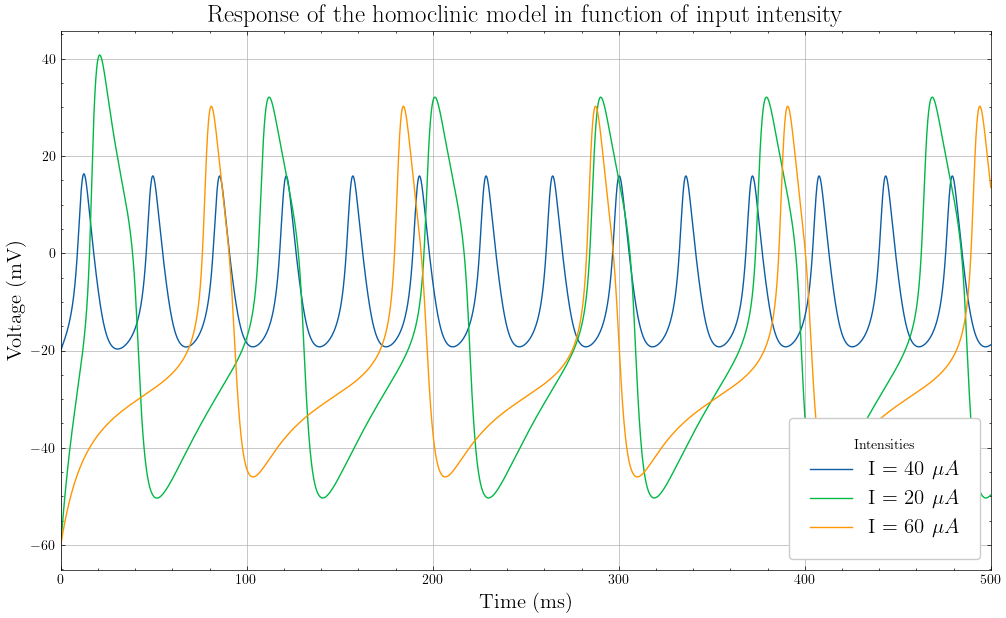

In [4]:
time = np.linspace(0,t_final,int(t_final/dt),)

plt.xlim(0,500)
plt.title('Response of the homoclinic model in function of input intensity')
plt.plot(time,data_homoclinic[:,0],label = r'I = 40 $\mu A$')
plt.plot(time,data_hopf[:,0], label = r'I = 20 $\mu A$')
plt.plot(time,data_SNLC[:,0], label = r'I = 60 $\mu A$')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend(title = 'Intensities',fancybox = True, frameon = True,framealpha = 1, shadow = False, borderpad = 1,prop ={'size': 15},loc='lower right')

In [52]:
#time constants
dt = 0.01
t_final = 300
k_ML_1 = 0.09
k_ML_2 = 0.04
I_hopf = np.zeros((int(t_final/dt),2))
I_SNLC= np.zeros((int(t_final/dt),2))
I_homoclinic = np.zeros((int(t_final/dt),2))
order = 2
y0 = [ -61, -61]
w0 = [0.0, 0.0]
y02 = [-59, -59]

for i in range(4999,15000):
    I_hopf[i,0] = 10
    I_SNLC[i,0] = 10
    I_homoclinic[i,0] = 10


data_hopf, complete_hopf, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML_2,tau)
data_SNLC, complete_SNLC, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_SNLC,I_SNLC,Is,k_ML_1,tau)
data_homoclinic, complete_homoclinic, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y02,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML_1,tau)

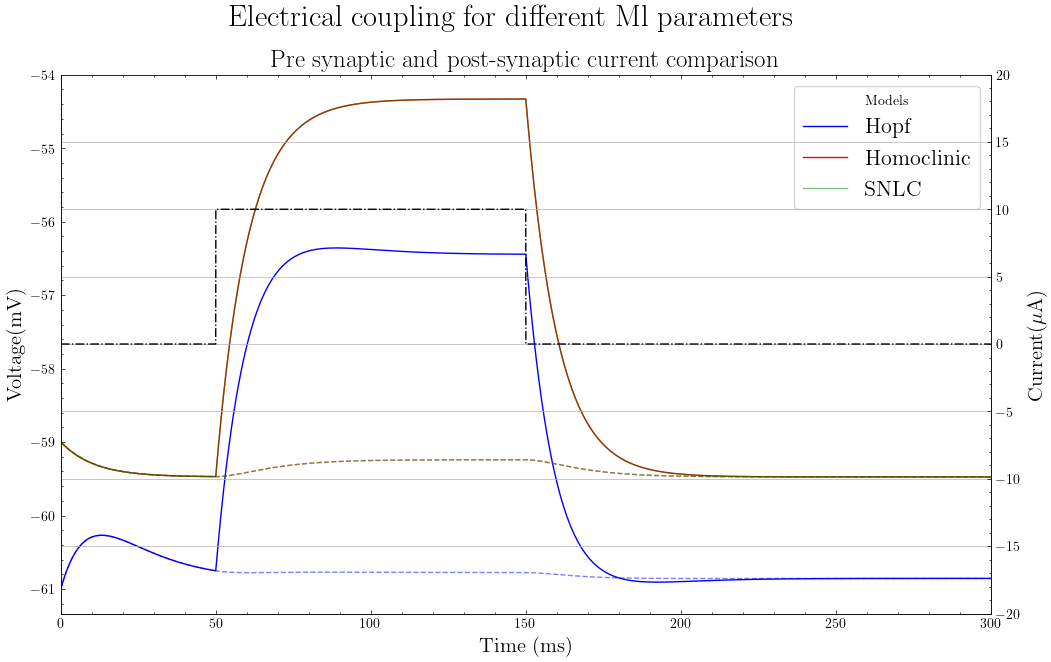

In [53]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1) = plt.subplots(1,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax1.title.set_text('Pre synaptic and post-synaptic current comparison')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-20,20)

fig.suptitle('Electrical coupling for different Ml parameters',fontsize=22)
ax1.set_xlim(0,300)
lns1 = ax1.plot(time,data_hopf[:,0], label = 'Hopf', color = 'b')
lns2 = ax1.plot(time,data_homoclinic[:,0], label = 'Homoclinic', color = 'r' )
lns3 = ax1.plot(time,data_hopf[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data_homoclinic[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data_SNLC[:,0], label = 'SNLC', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data_SNLC[:,1], 'g--', alpha = 0.5)
lnsc = ax3.plot(time,I_hopf[:,0],'-.', color = 'black')


ax1.grid()
ax1.legend(title='Models', ncols = 1 ,prop = {'size': 16}, frameon=True)
plt.show()

In [54]:
El = -61
variation_hopf = np.zeros((len(data_hopf[:,0]),1))
deltav1 = np.array(abs(El-data_hopf[:,0]))
deltav2 = np.array(abs(El-data_hopf[:,1]))
gj_transmission = deltav2 / deltav1
variation_hopf[:,0] = gj_transmission


El = -59.5
variation_SNLC = np.zeros((len(data_SNLC[:,0]),1))
deltav1 = np.array(abs(El-data_SNLC[:,0]))
deltav2 = np.array(abs(El-data_SNLC[:,1]))
gj_transmission = deltav2 / deltav1
variation_SNLC[:,0] = gj_transmission

variation_homoc = np.zeros((len(data_homoclinic[:,0]),1))
deltav1 = np.array(abs(El-data_homoclinic[:,0]))
deltav2 = np.array(abs(El-data_homoclinic[:,1]))
gj_transmission = deltav2 / deltav1
variation_homoc[:,0] = gj_transmission

/tmp/ipykernel_14672/2519946120.py:5: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


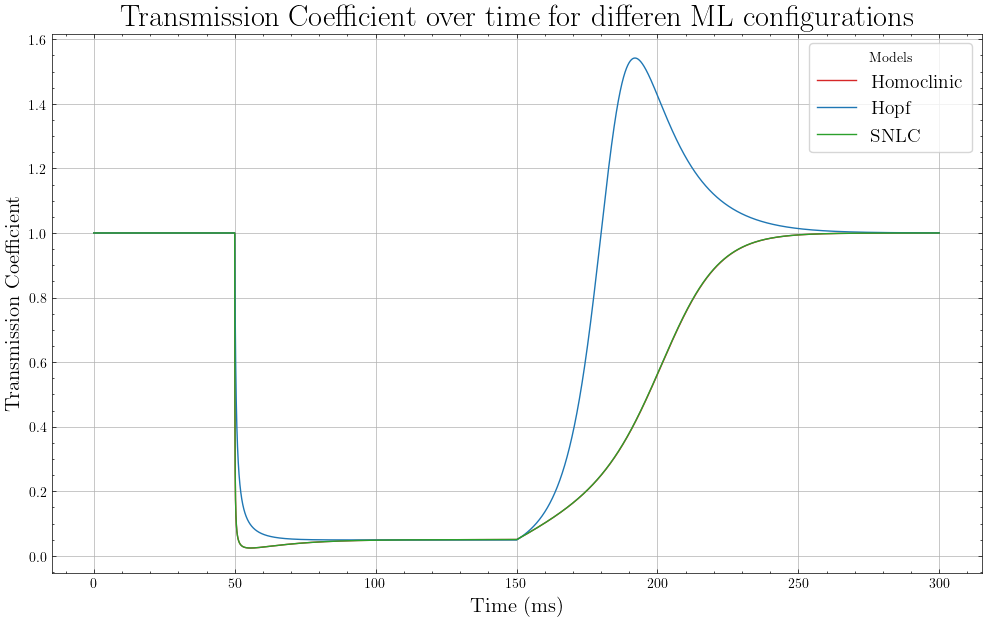

In [55]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('Time (ms)')
plt.ylabel('Transmission Coefficient')

#plt.xlim(0,170)
#plt.ylim(0.00,1.1)

plt.plot(time,variation_homoc, color = 'tab:red', label = 'Homoclinic')
plt.plot(time,variation_hopf, color = 'tab:blue' ,label = 'Hopf')
plt.plot(time,variation_SNLC, color = 'tab:green',label = 'SNLC')
plt.title('Transmission Coefficient over time for differen ML configurations', fontsize = 22)
plt.legend(title='Models',ncols=1, frameon = True, prop = {'size': 14})